In [1]:
# Import the related packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
register_matplotlib_converters()


import statsmodels.tsa.stattools as sts 

Import the Data Frame

In [2]:
#Insert the name and location of the data set to import it
df = pd.read_csv("ice_cream.csv")

In [3]:
#Determine the number of lags
nlags= 30

## ACF

ACF is used for Moving Average models

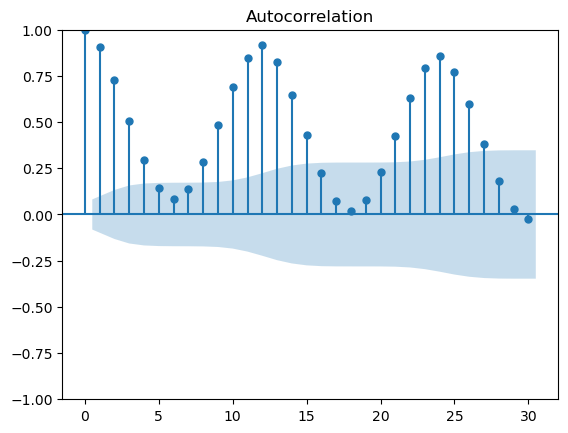

In [15]:
acf_plot = plot_acf(df["variable1"], lags = nlags)

## PACF

PACF is used for Autoregressive Models

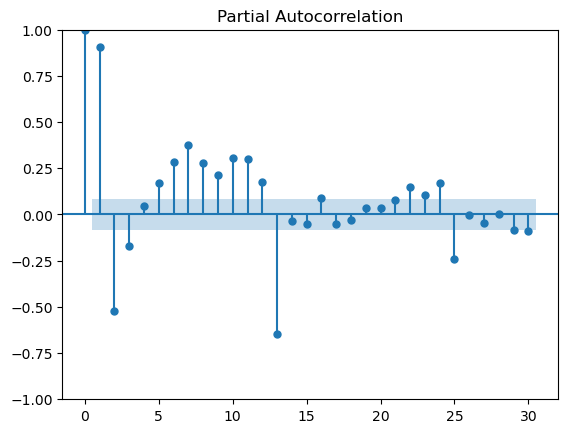

In [16]:
pacf_plot = plot_pacf(df["variable1"], lags = nlags)

To join both graphs in a single figure:

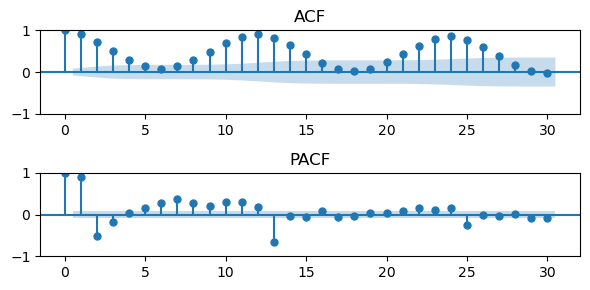

In [17]:
fig, axs = plt.subplots(2, figsize=(6, 3))

plot_acf(df["variable1"],lags = nlags, ax=axs[0])
axs[0].set_title('ACF')

plot_pacf(df["variable1"],lags = nlags, ax=axs[1])
axs[1].set_title('PACF')

plt.tight_layout()
plt.show()

### Full ADF test results

note: This code is originally from Dr. Jesse Grabowski from University París 1 Panthéon Sorbonne

In [20]:
# First define a set of helper functions to obtain the complete results of the ADF test

def make_var_names(var, n_lags, reg):
    names = [f'L1.{var}']
    for lag in range(1, n_lags + 1):
        names.append(f'D{lag}L1.{var}')
    if reg != 'n':
        names.append('Constant')
    if 't' in reg:
        names.append('Trend')

    return names

def ADF_test_summary(df, maxlag=None, autolag='BIC', missing='error'):
    if missing == 'error':
        if df.isna().any().any():
            raise ValueError("df has missing data; handle it or pass missing='drop' to automatically drop it.")
            
    if isinstance(df, pd.Series):
        df = df.to_frame()
        
    for series in df.columns:
        data = df[series].copy()
        if missing == 'drop':
            data.dropna(inplace=True)
            
        print(series.center(110))
        print(('=' * 110))
        line = 'Specification' + ' ' * 15 + 'Coeff' + ' ' * 10 + 'Statistic' + ' ' * 5 + 'P-value' + ' ' * 6 + 'Lags' + ' ' * 6 + '1%'
        line += ' ' * 10 + '5%' + ' ' * 8 + '10%'
        print(line)
        print(('-' * 110))
        spec_fixed = False
        for i, (name, reg) in enumerate(zip(['Constant and Trend', 'Constant Only', 'No Constant'], ['ct', 'c', 'n'])):
            stat, p, crit, regresult = sm.tsa.adfuller(data, regression=reg, regresults=True, maxlag=maxlag,
                                                       autolag=autolag)
            n_lag = regresult.usedlag
            gamma = regresult.resols.params[0]
            names = make_var_names(series, n_lag, reg)
            reg_coefs = pd.Series(regresult.resols.params, index=names)
            reg_tstat = pd.Series(regresult.resols.tvalues, index=names)
            reg_pvals = pd.Series(regresult.resols.pvalues, index=names)

            line = f'{name:<21}{gamma:13.3f}{stat:15.3f}{p:13.3f}{n_lag:11}{crit["1%"]:10.3f}{crit["5%"]:12.3f}{crit["10%"]:11.3f}'
            print(line)

            for coef in reg_coefs.index:
                if coef in name:
                    line = f"\t{coef:<13}{reg_coefs[coef]:13.3f}{reg_tstat[coef]:15.3f}{reg_pvals[coef]:13.3f}"
                    print(line)

In [21]:
#Apply the test
ADF_test_summary(df["variable1"])

                                                  variable1                                                   
Specification               Coeff          Statistic     P-value      Lags      1%          5%        10%
--------------------------------------------------------------------------------------------------------------
Constant and Trend          -0.021         -1.867        0.672         15    -3.975      -3.418     -3.132
	Constant             2.309          2.064        0.039
	Trend                0.000          0.181        0.856
Constant Only               -0.020         -2.075        0.255         15    -3.442      -2.867     -2.570
	Constant             2.264          2.079        0.038
No Constant                 -0.000         -0.161        0.628         15    -2.570      -1.941     -1.616


Another way to run the test, is to run the simple ADF test of the statsmodels package:

In [4]:
sts.adfuller(df["variable1"])

(-1.7580087755105493,
 0.4014992899407584,
 19,
 557,
 {'1%': -3.4421447800270673,
  '5%': -2.8667429272780858,
  '10%': -2.5695409929766093},
 3284.760793628813)